# Fun with Python and Quantum Physics

most stuff taken from the [textbook](https://qiskit.org/textbook)

# Absolute minimum of physics and math needed

## Linear Algebra
- a vector is an element of a vector space
- a vector space over a field is a set of elements with an addition inside the set and a multiplication with an element from the field

In math speak:
$$
K \textrm{ is a field} \\
V \textrm{ is a set} \\
(V, +, \cdot) \textrm{ is a vector space over } K \textrm{ with} \\
+ := V \times V \to V \\
\cdot := K \times V \to V
$$



# Qiskit

In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.9.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.21.0'}

You can run your circuits for free on [IBMQ](https://quantum-computing.ibm.com/)

In [3]:
from qiskit import IBMQ

In [4]:
# paste your api tokes here and remove the comment
#IBMQ.save_account(your key)

In [5]:
IBMQ.load_account()

/home/max/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider()

In [7]:
from qiskit import *
from qiskit.visualization import plot_histogram

## Creating Circuits

### basics
- create a circuit: ```QuantumCircuit(number of qbits, number of cbits)```
    - qbits are initalized on 0
    - cbit is a classical bit (definite 0 or 1)
    - you need to measure qbits to get a result, the cbits work as some sort of output for that
- add measurement: ```qc.measure(index of qbit, index of cbit)``` with qc being your circuit
- visualize circuit: ```qc.draw()``` 
    - add 'mpl' as argument for looks
- run circuit: ```execute(circuit, backend)```
    - backend can be either the qasm simulator or a real machine

In [8]:
# setup

n = 8
n_q = n # number of qbits
n_c = n # number of classical bits / output bits

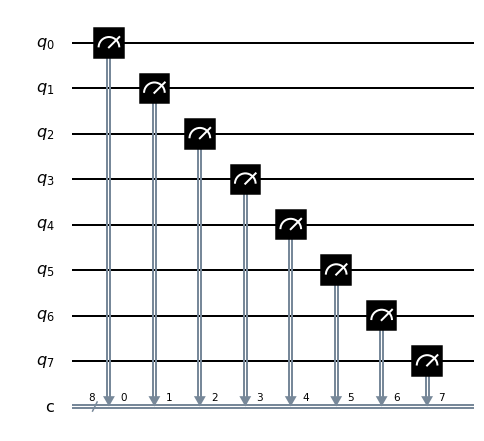

In [9]:
# output circuit

qc_output = QuantumCircuit(n_q, n_c)
for j in range(n):
    qc_output.measure(j, j)
    
qc_output.draw('mpl')

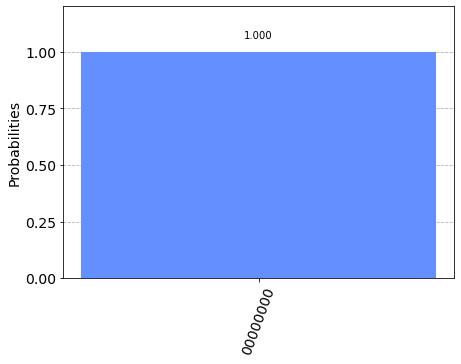

In [10]:
# executing and showing result
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

The qasm_simulator only simulates a perfect quantum computer, so there is no noise.

In [11]:
# seeing what backends are available
print(provider.backends()) 

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [ ]:
# choose a backend, for example ibmq_16_melbourne (it's actually in New York and not Melbourne) and run your circuit like before but with the new backend (might take a while).

# executing and showing result
backend = provider.get_backend('ibmq_16_melbourne')
counts = execute(qc_output, backend).result().get_counts()
plot_histogram(counts)

Because of the noise, you have to run circuits multiple times for "correct" results.

The simulator is enough for debugging and prototypes, but can't handle more than around 30 qbits.

In [ ]:
## number of times the circuit was run:
sum(counts.values())

### Gates

- like normal gates, but with a quantum spin (and there are just normal gates too).


In [ ]:
# not or x-gate

qc_encode = QuantumCircuit(n_q)

# this results in a 20d (000010100b)
qc_encode.x(2)
qc_encode.x(4)


qc = qc_encode + qc_output
qc.draw('mpl')

In [ ]:
# executing and showing result
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

### Half Adder

- cx = conditional not, basically quantum xor: ```qc.cx(first, second)``` overwrites second
- ccx = Toffoli Gate, basically quantum and: ```qc.ccx(first, second, output)``` overwrites output

In [ ]:
qh = QuantumCircuit(4,2)

# encoding a 1 + 1
qh.x(0)
qh.x(1)

qh.cx(0, 2)
qh.cx(1, 2)
qh.ccx(0, 1, 3)

qh.measure(2, 0)
qh.measure(3, 1)

qh.draw('mpl')

In [ ]:
# executing and showing result
counts = execute(qh, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

### 2 Bit Adder

#### encoding

In [ ]:
# needed registers
a0 = QuantumRegister(1, 'a0')
a1 = QuantumRegister(1, 'a1')
b0 = QuantumRegister(1, 'b0')
b1 = QuantumRegister(1, 'b1')

In [ ]:
qc_encode = QuantumCircuit(a0, a1, b0, b1)

# encode 1 + 3
qc_encode.x(0)
#qc_encode.x(1)
qc_encode.x(2)
qc_encode.x(3)

qc_encode.draw('mpl')

#### computation

In [ ]:
c0 = QuantumRegister(2, 'c0')

qc_ha_0 = QuantumCircuit(a0, b0, c0)

qc_ha_0.cx(1, 2)
qc_ha_0.cx(0, 2)
qc_ha_0.ccx(0, 1, 3)

c1 = QuantumRegister(2, 'c1')

qc_ha_1 = QuantumCircuit(a1, b1, c1)

qc_ha_1.cx(1, 2)
qc_ha_1.cx(0, 2)
qc_ha_1.ccx(0, 1, 3)

d = QuantumRegister(3, 'd')
q = QuantumRegister(1, 'q')
qc_fa = QuantumCircuit(c0, c1, q, d)

# c0_1 xor c1_0 -> d1
qc_fa.cx(1, 6)
qc_fa.cx(2, 6)

# c0_1 and c1_0 -> q_0
qc_fa.ccx(1, 2, 4)

# c1_0 or c1_1 -> d2
qc_fa.cx(3, 7)
qc_fa.cx(4, 7)
qc_fa.ccx(3, 4, 7)

# c0_0 -> d0
qc_fa.cx(0, 5)

qc_compute = qc_ha_0 + qc_ha_1 + qc_fa
qc_compute.draw('mpl', justify='none')

#### output

In [ ]:
o = ClassicalRegister(3, 'o')

qc_output = QuantumCircuit(d, o)

for i in range(3):
    qc_output.measure(i, i)
    
qc_output.draw('mpl')

In [ ]:
qc = qc_encode + qc_compute + qc_output
qc.draw('mpl')

In [ ]:
# executing and showing result
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [ ]:
backend = provider.get_backend('ibmq_16_melbourne')
counts = execute(qc, backend).result().get_counts()
plot_histogram(counts)